In [2]:
######### A6 ###########
from mnist import MNIST
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_dataset():
  mndata = MNIST('../../hw1/python-mnist/data/')
  X_train, labels_train = map(np.array, mndata.load_training())
  X_test, labels_test = map(np.array, mndata.load_testing())
  X_train = X_train/255.0
  X_test = X_test/255.0
  return X_test,labels_test,X_train,labels_train

In [4]:
X_test,labels_test,X_train,labels_train = load_dataset()

In [16]:
n_train, d = X_train.shape
n_test, d = X_test.shape

train_mean =np.mean(X_train.T, axis = 1).reshape(d,1)
X_train_demean = X_train.T  - train_mean
X_test_demean = X_test.T  -train_mean


In [17]:
#A
# The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.


In [18]:
U,S,VT = np.linalg.svd(X_train_demean,full_matrices=0)

In [19]:
print(U.shape)
print(X_train_demean.shape)
print(S.shape)
print(VT.shape)
# U_r.T X
# if k = 5:  Ur.T X_train_demean -> 5 * 60000 Ur*res -> 784*60000

(784, 784)
(784, 60000)
(784,)
(784, 60000)


In [8]:
############################# A6c (2) ##########################3

In [9]:
mse_train=[]
mse_test = []
for k in range(100):
    Ur = U[:,:k]
    rec_train = np.dot(Ur, np.dot(Ur.T, X_train_demean))
    mse_train.append(1/n_train* np.sum(np.power(rec_train - X_train_demean,2 )))
    rec_test = np.dot(Ur, np.dot(Ur.T, X_test_demean))
    mse_test.append(1/n_test* np.sum(np.power(rec_test - X_test_demean,2 )))
   

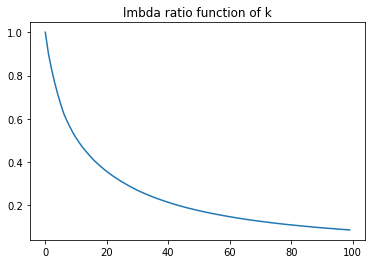

In [24]:
lmbs = np.power(S,2)
sum_lmbda = np.sum(lmbs)
lmb_sum_list = [1-np.sum(lmbs[:k])/sum_lmbda for k in range(100)]
plt.plot (lmb_sum_list)
plt.title('lmbda ratio function of k')
plt.savefig('A6b2')

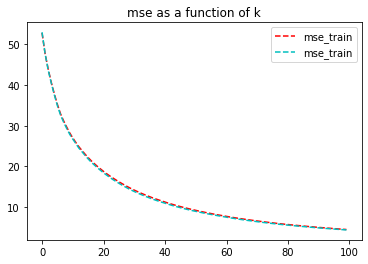

In [23]:
plt.plot(range(100),mse_train,'r--',label = 'mse_train')
plt.plot(range(100),mse_test,'c--',label = 'mse_train')
plt.legend()
plt.title('mse as a function of k')
plt.savefig('A6b1')

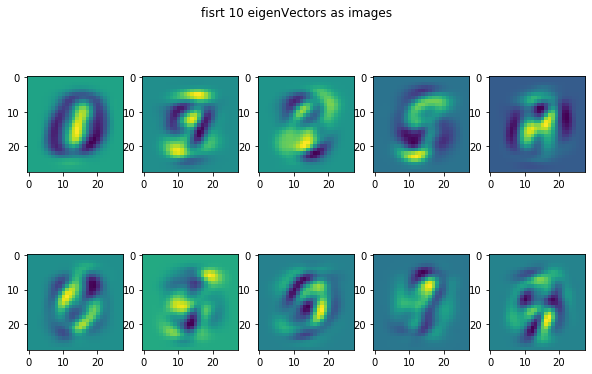

In [35]:

#plt.figure(figsize=(12,8)) 
f, axarr = plt.subplots(2,5,figsize=(10,6))
axarr[0,0].imshow(U[:,0].reshape(28,28))
axarr[0,1].imshow(U[:,1].reshape(28,28))
axarr[0,2].imshow(U[:,2].reshape(28,28))
axarr[0,3].imshow(U[:,3].reshape(28,28))
axarr[0,4].imshow(U[:,4].reshape(28,28))

axarr[1,0].imshow(U[:,5].reshape(28,28))
axarr[1,1].imshow(U[:,6].reshape(28,28))
axarr[1,2].imshow(U[:,7].reshape(28,28))
axarr[1,3].imshow(U[:,8].reshape(28,28))
axarr[1,4].imshow(U[:,9].reshape(28,28))
f.suptitle('fisrt 10 eigenVectors as images', fontsize=12)

plt.savefig('A6c')
    

In [11]:
ind_267 = [np.where(labels_train==2)[0][0],np.where(labels_train==6)[0][0],np.where(labels_train==7)[0][0]]

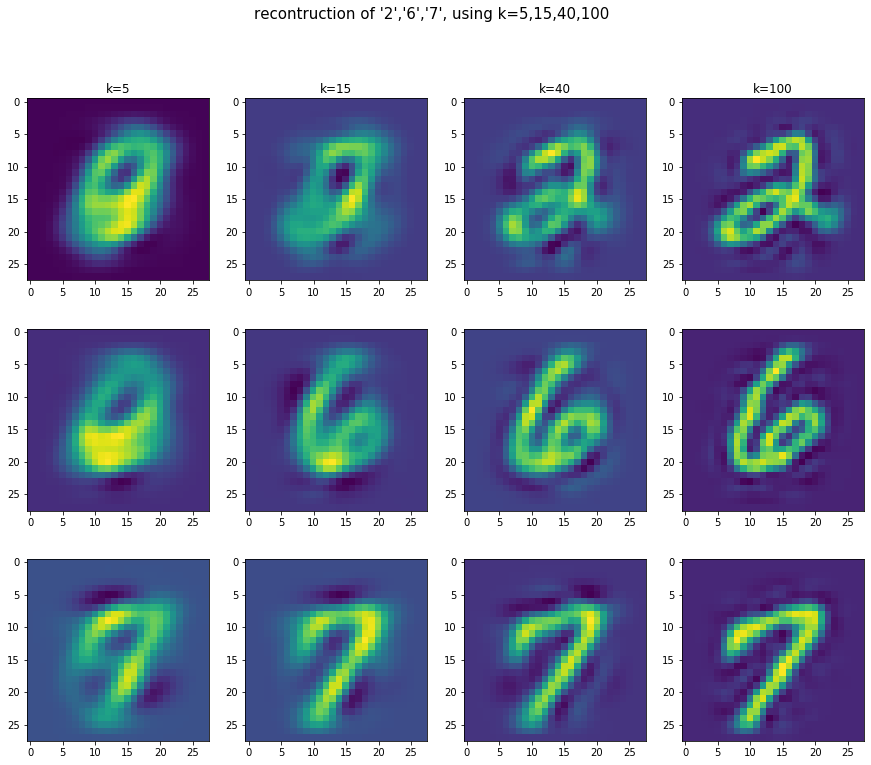

In [38]:
ks = [5,15,40,100]
f, axarr = plt.subplots(3,4,figsize=(15,12))
r = 0; c = 0;
for ind in ind_267:
    for k in ks:
        Ur = U[:,:k]
        rec_train = np.dot(Ur, np.dot(Ur.T, X_train_demean[:,ind])) + train_mean.T
        axarr[r,c].imshow(rec_train.reshape(28,28))
        c += 1
    c =0
    r +=1
    
f.suptitle('recontruction of \'2\',\'6\',\'7\', using k=5,15,40,100', fontsize=15)


count = 0
for ax in axarr[0]:
    ax.set_title('k={}'.format(ks[count]))
    count += 1
#plt.savefig('A6d')
        